In [76]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, Imputer, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("../data/processed/1/dataset.csv.gz", index_col="MUTANT")
dataset = dataset[dataset.TYPE != "Unclassified"]
feat_cols = dataset.drop("TYPE", 1).columns

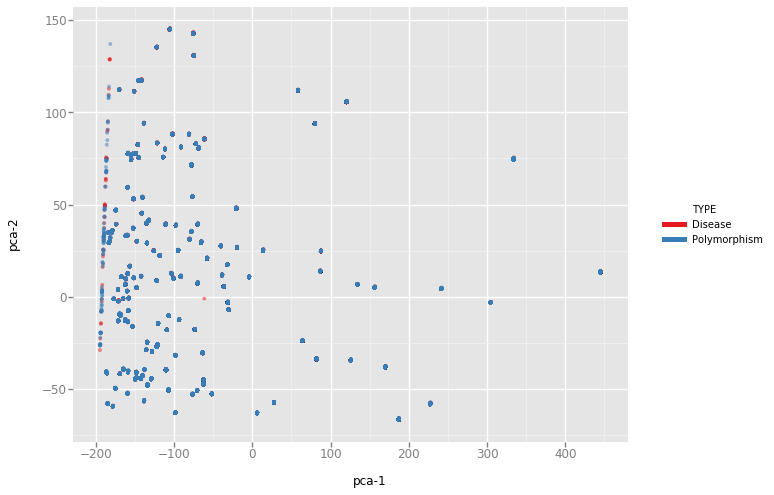

<ggplot: (8751198729371)>

In [3]:
model = Pipeline([
    ('imputer', Imputer(missing_values="NaN", strategy="median")), 
    ('pca', PCA(n_components=15))
])

pca_result = model.fit_transform(dataset[feat_cols].values)


dataset['pca-1'] = pca_result[:,0]
dataset['pca-2'] = pca_result[:,1] 
dataset['pca-3'] = pca_result[:,2]


from ggplot import *

chart = ggplot(dataset, aes(x='pca-1', y='pca-2', color='TYPE') ) \
        + geom_point(size=15,alpha=0.5) \
        + scale_color_brewer(type = 'qual', palette = 'Set1')

chart

In [10]:
dataset_values.copy()

array([[  1.00000000e+00,   1.81666667e+00,  -4.00000000e+00, ...,
         -5.76081468e-01,   3.37018141e-04,  -3.42572666e-04],
       [ -2.00000000e+00,  -1.40333333e+00,  -6.20000000e+00, ...,
          5.33157170e-01,   2.22372449e-02,   2.22507541e-02],
       [ -1.00000000e+00,   1.81333333e+00,   1.42000000e+01, ...,
          5.25796406e-01,   1.21626984e-03,   1.22655088e-03],
       ..., 
       [  0.00000000e+00,  -2.59000000e+00,  -2.20000000e+00, ...,
         -5.23402728e-02,   5.58304989e-03,   5.61013646e-03],
       [  1.00000000e+00,  -1.70000000e+00,   1.02000000e+01, ...,
         -6.32256681e-02,   4.61706349e-03,  -4.62522552e-03],
       [  1.00000000e+00,   1.75000000e+00,  -1.00000000e+01, ...,
          9.78922211e-02,   1.80734127e-02,   1.80170799e-02]])

In [14]:
tsne_results

array([[-13.68104549,  -4.0095953 ],
       [ -0.75331426, -14.48238035],
       [ 11.85679203,  -4.30927453],
       ..., 
       [  1.32685894, -11.09956297],
       [  3.47620735,   2.75642208],
       [ -6.46757599,  -8.96349285]])

In [16]:
import time

n_sne = 7000
rndperm = np.random.permutation(dataset.shape[0])
subset = rndperm[:n_sne]
perplexities = [500]
RANDOM_STATE = 50

for p in perplexities:
    print("Perplexity: {}".format(p))
    time_start = time.time()
    model = Pipeline([
    ('imputer', Imputer(missing_values="NaN", strategy="median")), 
    ('tsne', TSNE(n_components=2, verbose=0, perplexity=p, n_iter=1000))
    ])
    
    tsne_results = model.fit_transform(dataset.ix[subset,feat_cols].values)
    
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    df_tsne = dataset.ix[subset,:].copy()
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]

    chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='TYPE') ) \
            + geom_point(size=15,alpha=0.5) \
            + scale_color_brewer(type = 'qual', palette = 'Set1')
    chart.save(filename="/home/marlan/Desktop/perplexity_{}.jpg".format(p))

Perplexity: 500
t-SNE done! Time elapsed: 215.2473394870758 seconds


In [76]:
df_tsne.TYPE.value_counts()

Polymorphism    4033
Disease         2967
Name: TYPE, dtype: int64

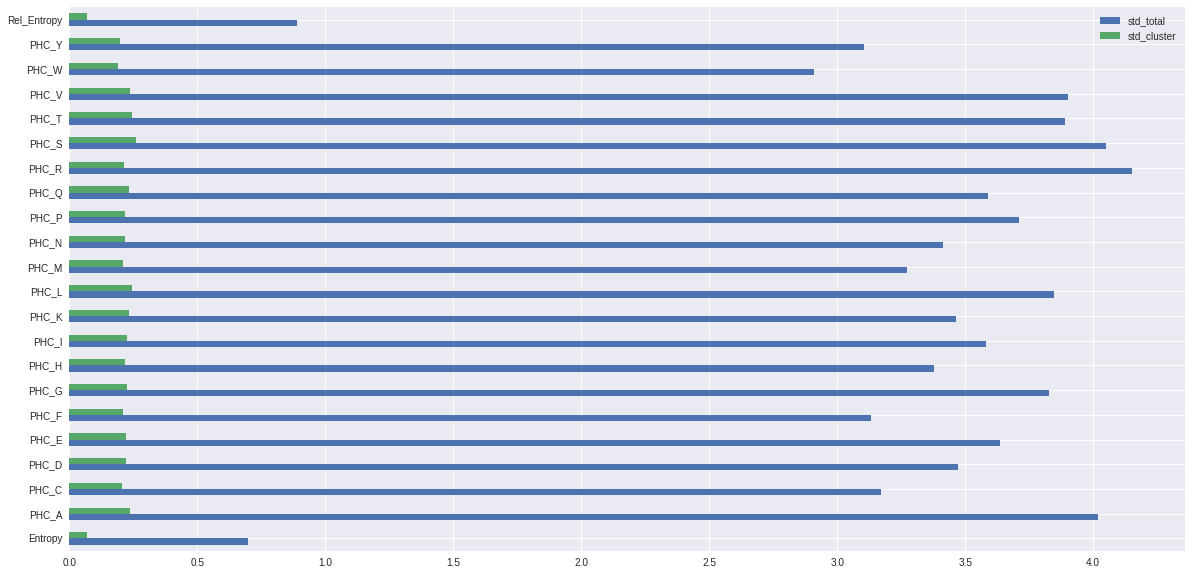

In [84]:
genomic_msa = pd.read_csv("../data/external/snvbox_features/genomic_msa_features.csv").drop_duplicates()
counts = genomic_msa.groupby(["UID", "Pos"]).size().reset_index(name='counts')
counts = counts[counts.counts > 1]
std_total = genomic_msa.describe().loc["std"].rename("std_total")
std_clusters = genomic_msa.groupby(["UID", "Pos"]).std().fillna(0).merge(counts, left_index=True, right_on=["UID", "Pos"]).describe().loc["mean"].rename("std_cluster")
pd.concat([std_total, std_clusters], axis=1).drop(["counts", "Pos", "PHC_sum", "PHC_squaresum"]).plot(kind='barh', figsize=(20, 10))

In [ ]:
model = Pipeline([
('imputer', Imputer(missing_values="NaN", strategy="median")), 
('tsne', TSNE(n_components=2, verbose=0, perplexity=p, n_iter=1000))
])

tsne_results = model.fit_transform(dataset.ix[subset,feat_cols].values)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df_tsne = dataset.ix[subset,:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='TYPE') ) \
        + geom_point(size=15,alpha=0.5) \
        + scale_color_brewer(type = 'qual', palette = 'Set1')
chart.save(filename="/home/marlan/Desktop/perplexity_{}.jpg".format(p))